# أنت تحاول والله يراك و هذا يكفي

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from keras.utils import to_categorical




In [98]:
file=pd.read_csv('me_cfs_vs_depression_dataset.csv')

In [99]:
file

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,NaN,24.0,1.6,13.0,6.9,0,Partially working,NaN,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,No,Both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25,Female,8.2,9.2,8.8,3.6,10.0,6.9,29.0,3.2,0,Partially working,Medium,NaN,Yes,Depression
996,66,Male,9.7,1.3,2.4,2.8,9.0,7.0,34.0,NaN,1,Working,Very high,Rarely,No,ME/CFS
997,52,Male,8.7,4.2,8.7,3.4,7.0,7.0,40.0,9.2,1,Working,Very high,Daily,Yes,ME/CFS
998,69,Male,2.1,1.1,9.9,2.5,15.0,3.5,37.0,3.3,0,Partially working,Low,Never,No,Depression


In [100]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1000 non-null   int64  
 1   gender                        1000 non-null   object 
 2   sleep_quality_index           953 non-null    float64
 3   brain_fog_level               952 non-null    float64
 4   physical_pain_score           966 non-null    float64
 5   stress_level                  952 non-null    float64
 6   depression_phq9_score         978 non-null    float64
 7   fatigue_severity_scale_score  979 non-null    float64
 8   pem_duration_hours            976 non-null    float64
 9   hours_of_sleep_per_night      979 non-null    float64
 10  pem_present                   1000 non-null   int64  
 11  work_status                   953 non-null    object 
 12  social_activity_level         960 non-null    object 
 13  exer

# Show Nulls

In [101]:
file.isnull().sum()

age                              0
gender                           0
sleep_quality_index             47
brain_fog_level                 48
physical_pain_score             34
stress_level                    48
depression_phq9_score           22
fatigue_severity_scale_score    21
pem_duration_hours              24
hours_of_sleep_per_night        21
pem_present                      0
work_status                     47
social_activity_level           40
exercise_frequency              39
meditation_or_mindfulness       11
diagnosis                        0
dtype: int64

# deal with nulls 

# fill nulls with mean value

# function to fill all nulls with numerical values in this columns 

In [102]:
list_fill_by_mean=['sleep_quality_index','brain_fog_level','physical_pain_score','stress_level','depression_phq9_score','fatigue_severity_scale_score','pem_duration_hours','hours_of_sleep_per_night']

for i in list_fill_by_mean:
    mean_value=file[i].mean()
    file[i]=file[i].fillna(value=mean_value)


# fill nulls with mood

# function to fill all nulls with categorical values in this columns 

In [103]:
list_fill_by_mood=['work_status','social_activity_level','exercise_frequency','meditation_or_mindfulness']

for i in list_fill_by_mood:
    mood_value=file[i].mode()[0]
    file[i]=file[i].fillna(value=mood_value)

In [104]:
file.isnull().sum()

age                             0
gender                          0
sleep_quality_index             0
brain_fog_level                 0
physical_pain_score             0
stress_level                    0
depression_phq9_score           0
fatigue_severity_scale_score    0
pem_duration_hours              0
hours_of_sleep_per_night        0
pem_present                     0
work_status                     0
social_activity_level           0
exercise_frequency              0
meditation_or_mindfulness       0
diagnosis                       0
dtype: int64

# there are no nulls

# Encoding Some Values

## 1- Binary Encoding

In [105]:
list_1=['meditation_or_mindfulness','gender']

file['meditation_or_mindfulness']=file['meditation_or_mindfulness'].map({'Yes':1,'No':0})

file['gender']=file['gender'].map({'Male':1,'Female':0})


In [106]:
file

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,1,8.7,3.9,9.2,8.100000,10.0,6.5,9.0,7.700000,0,Working,Low,Daily,1,Depression
1,69,1,1.3,9.9,4.2,9.900000,20.0,7.0,41.0,8.400000,1,Working,Low,Often,1,Both
2,46,0,4.0,5.4,4.8,5.459139,24.0,1.6,13.0,6.900000,0,Partially working,Very low,Rarely,1,Depression
3,32,0,9.4,2.1,2.9,3.800000,10.0,6.8,11.0,7.500000,0,Not working,High,Never,1,Depression
4,60,0,7.6,7.5,6.4,8.500000,17.0,7.0,46.0,3.100000,1,Not working,Low,Rarely,0,Both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25,0,8.2,9.2,8.8,3.600000,10.0,6.9,29.0,3.200000,0,Partially working,Medium,Rarely,1,Depression
996,66,1,9.7,1.3,2.4,2.800000,9.0,7.0,34.0,6.571297,1,Working,Very high,Rarely,0,ME/CFS
997,52,1,8.7,4.2,8.7,3.400000,7.0,7.0,40.0,9.200000,1,Working,Very high,Daily,1,ME/CFS
998,69,1,2.1,1.1,9.9,2.500000,15.0,3.5,37.0,3.300000,0,Partially working,Low,Never,0,Depression


In [107]:
list_to_encoding=['work_status','social_activity_level','exercise_frequency']

for i in list_to_encoding:
    print(file[i].value_counts())
    print(end=" ")

work_status
Partially working    382
Working              320
Not working          298
Name: count, dtype: int64
 social_activity_level
Very low     243
High         200
Low          190
Very high    186
Medium       181
Name: count, dtype: int64
 exercise_frequency
Rarely       249
Often        202
Daily        194
Sometimes    184
Never        171
Name: count, dtype: int64
 

## 2- One_Hot_Encoding

In [108]:
list_to_encoding = ['work_status', 'social_activity_level', 'exercise_frequency']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  

for col in list_to_encoding:
    encoded = encoder.fit_transform(file[[col]])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([col]), index=file.index)

    file = pd.concat([file, encoded_df], axis=1)
    file.drop(columns=[col], inplace=True)


In [109]:
file['diagnosis'].value_counts()

diagnosis
Depression    401
ME/CFS        397
Both          202
Name: count, dtype: int64

## 3- Label Encoding

In [110]:
le = LabelEncoder()
file['diagnosis'] = le.fit_transform(file['diagnosis'])

# Show Relationship

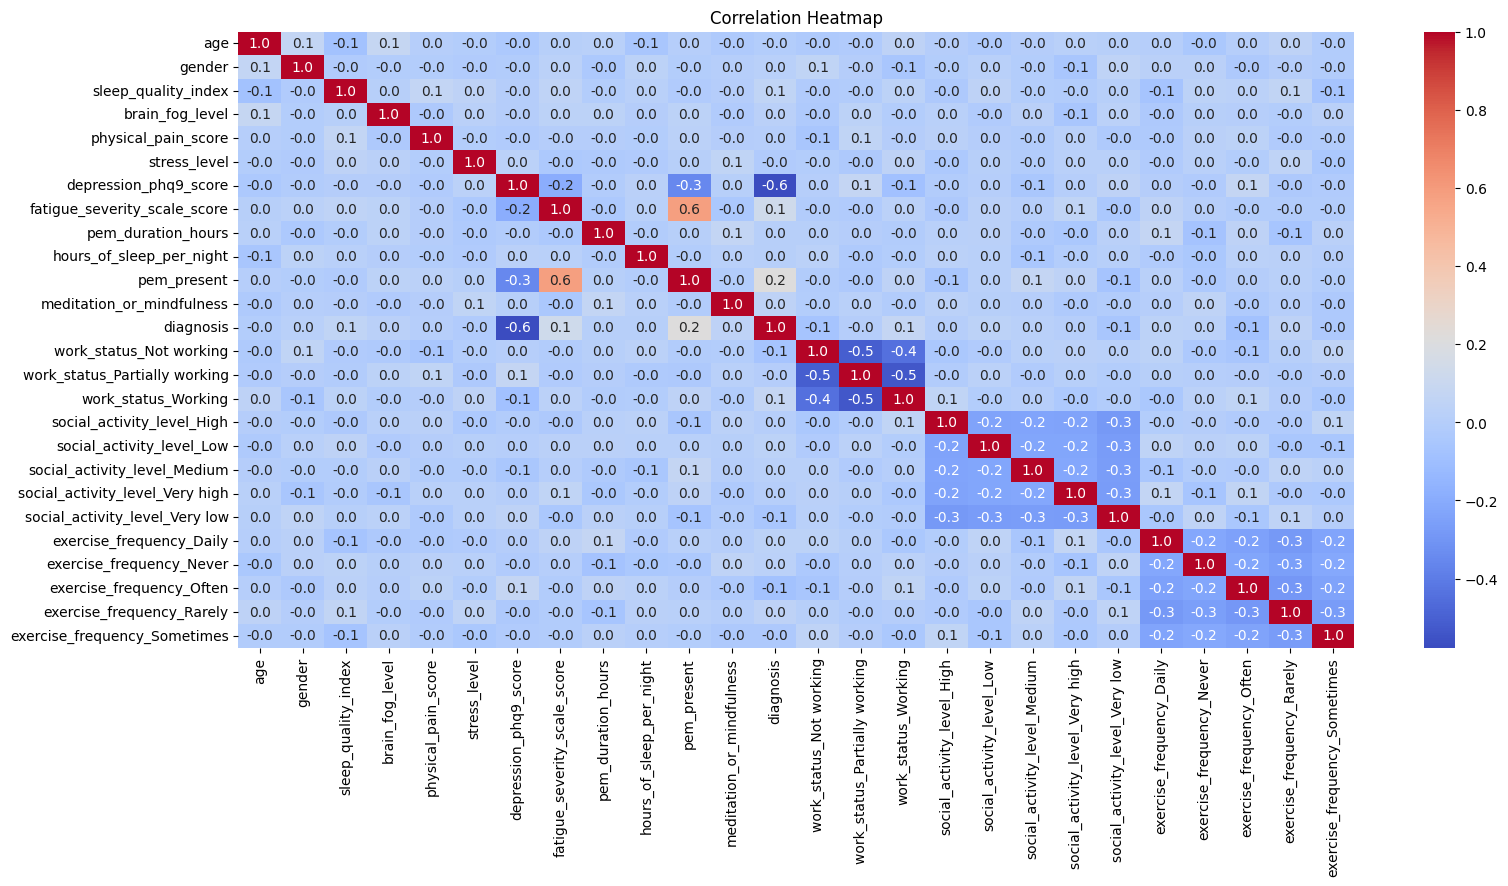

In [111]:
plt.figure(figsize=(18, 8))  # تحكم في حجم الشكل
sns.heatmap(file.corr(), annot=True, cmap='coolwarm', fmt='.1f')  # annot=True لعرض الأرقام
plt.title('Correlation Heatmap')
plt.show()

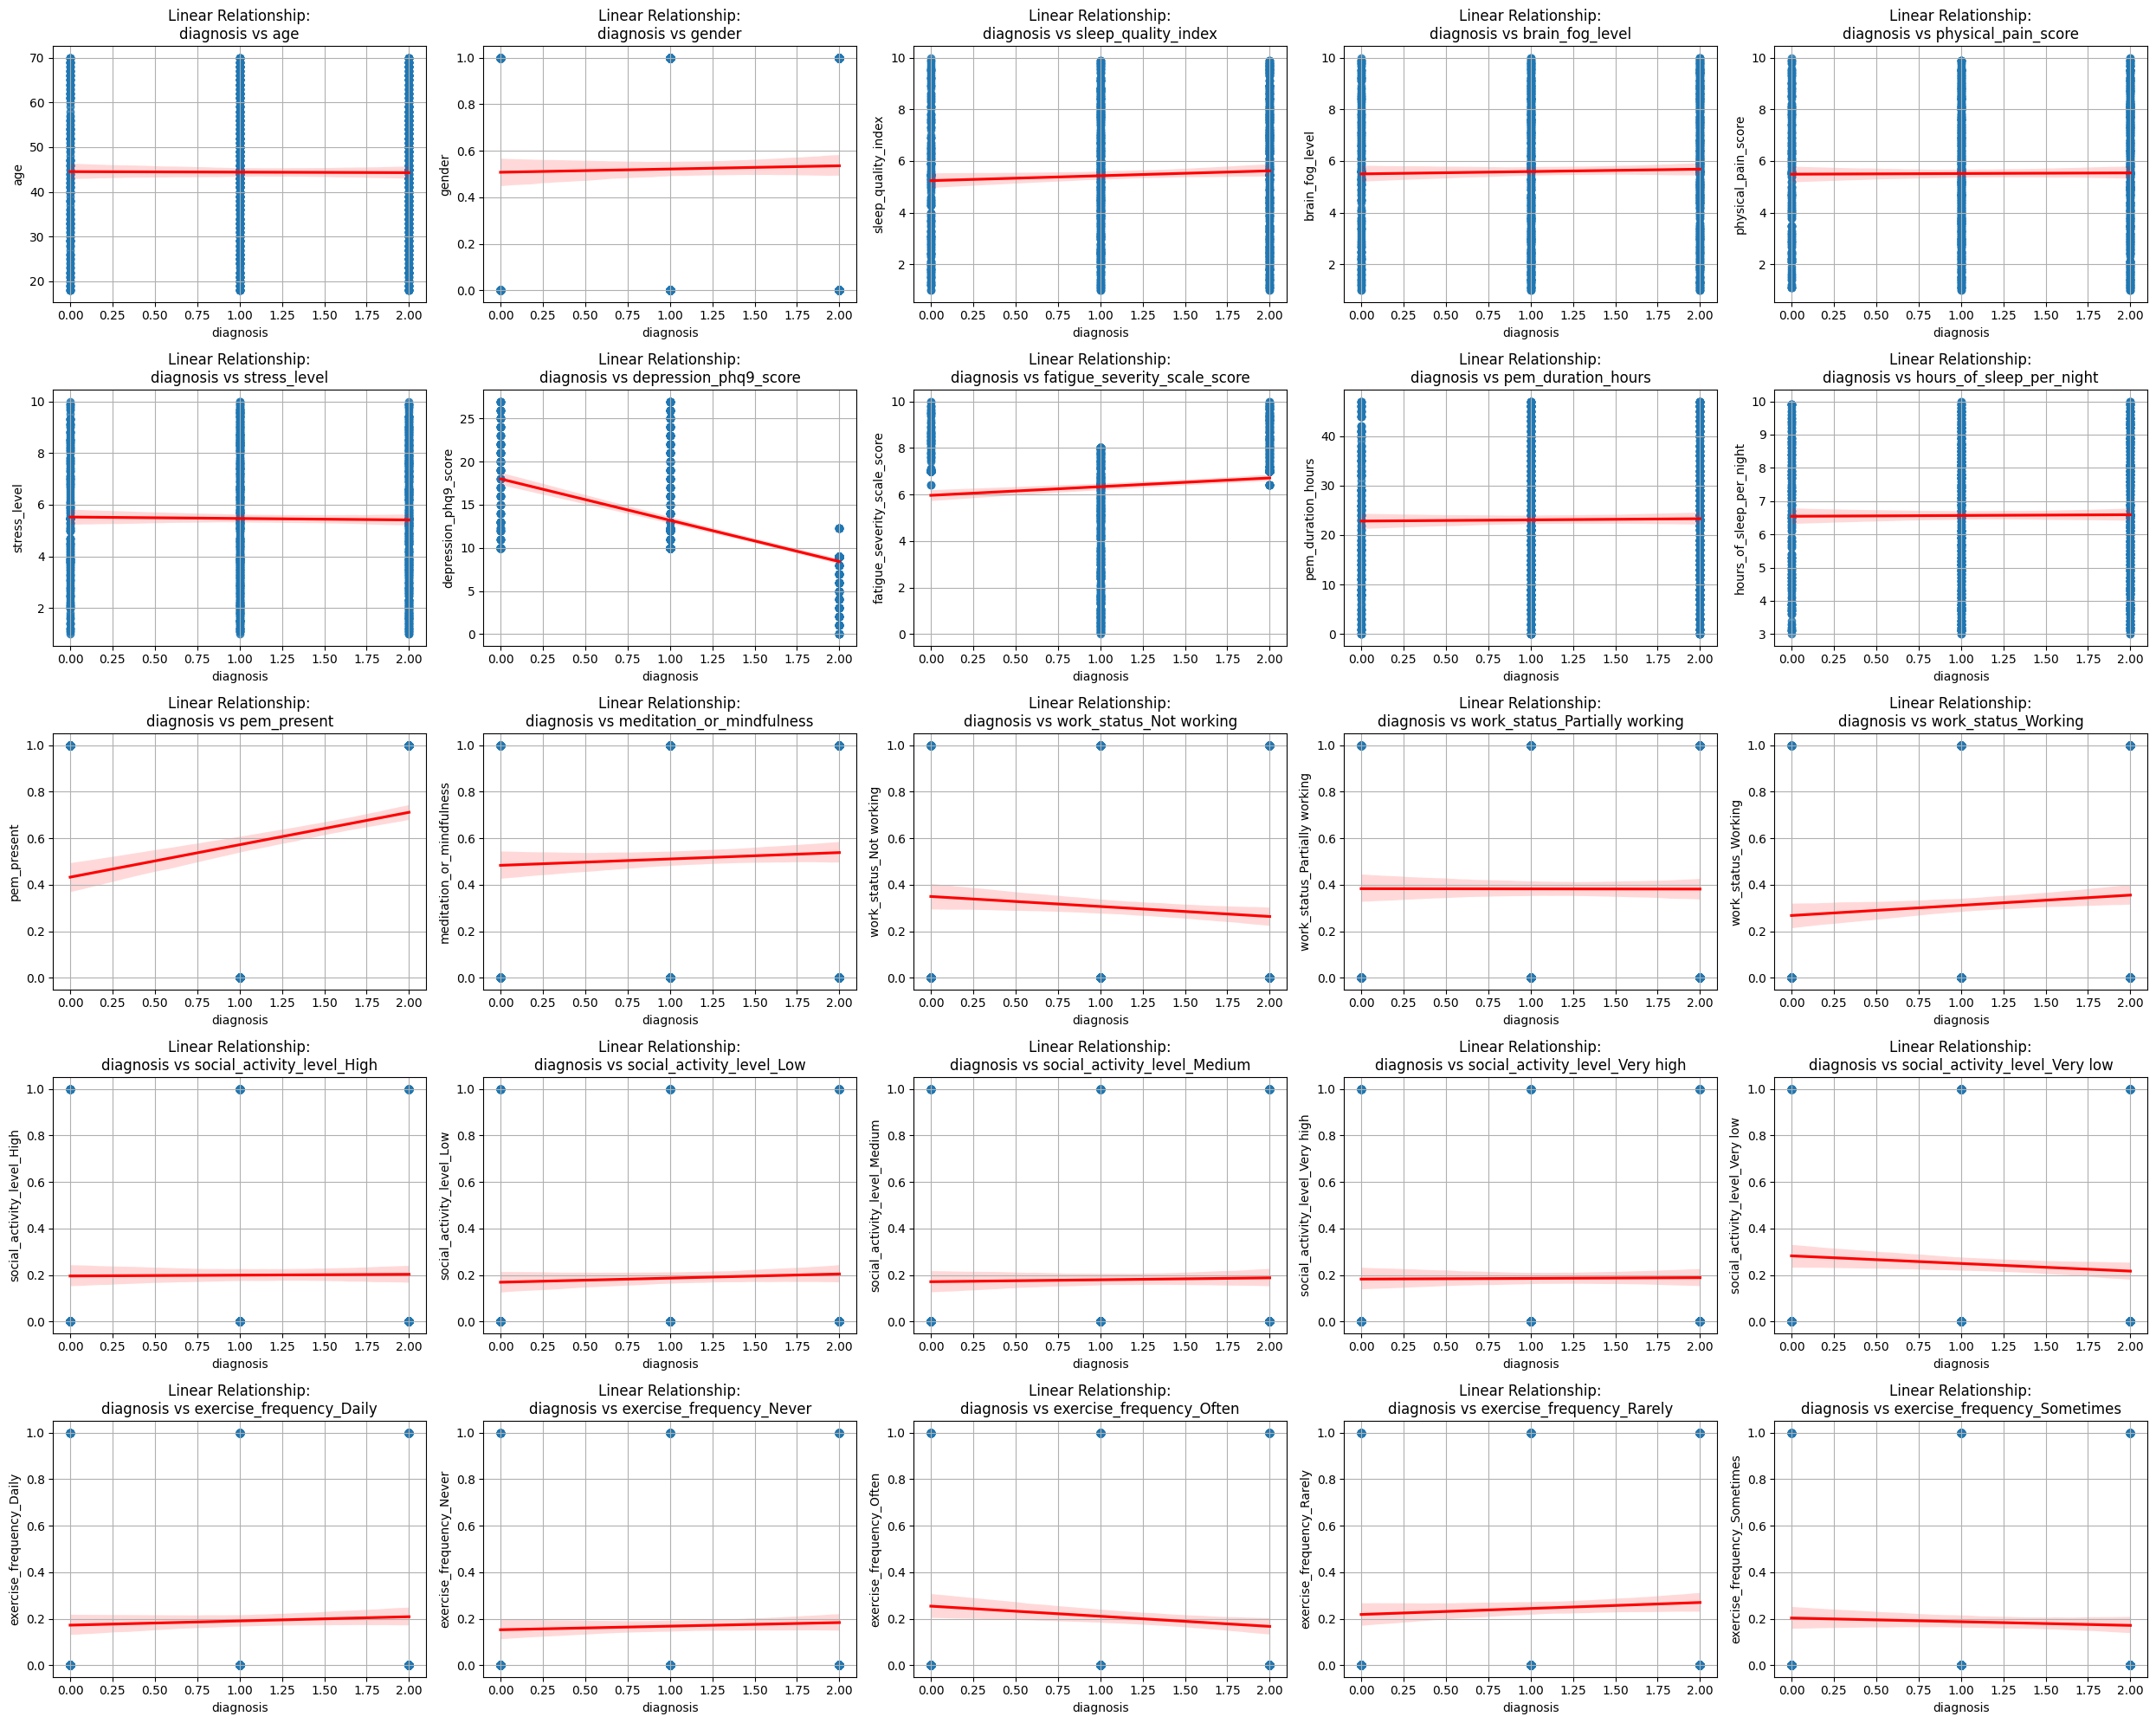

In [112]:

cols = [col for col in file.columns if col != 'diagnosis']  

n_cols =5
n_rows = (len(cols) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  

for i, col in enumerate(cols):
    sns.regplot(data=file, x='diagnosis', y=col, line_kws={"color": "red"}, ax=axes[i])
    axes[i].set_title(f"Linear Relationship:\ndiagnosis vs {col}")
    axes[i].set_xlabel('diagnosis')
    axes[i].set_ylabel(col)
    axes[i].grid(True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

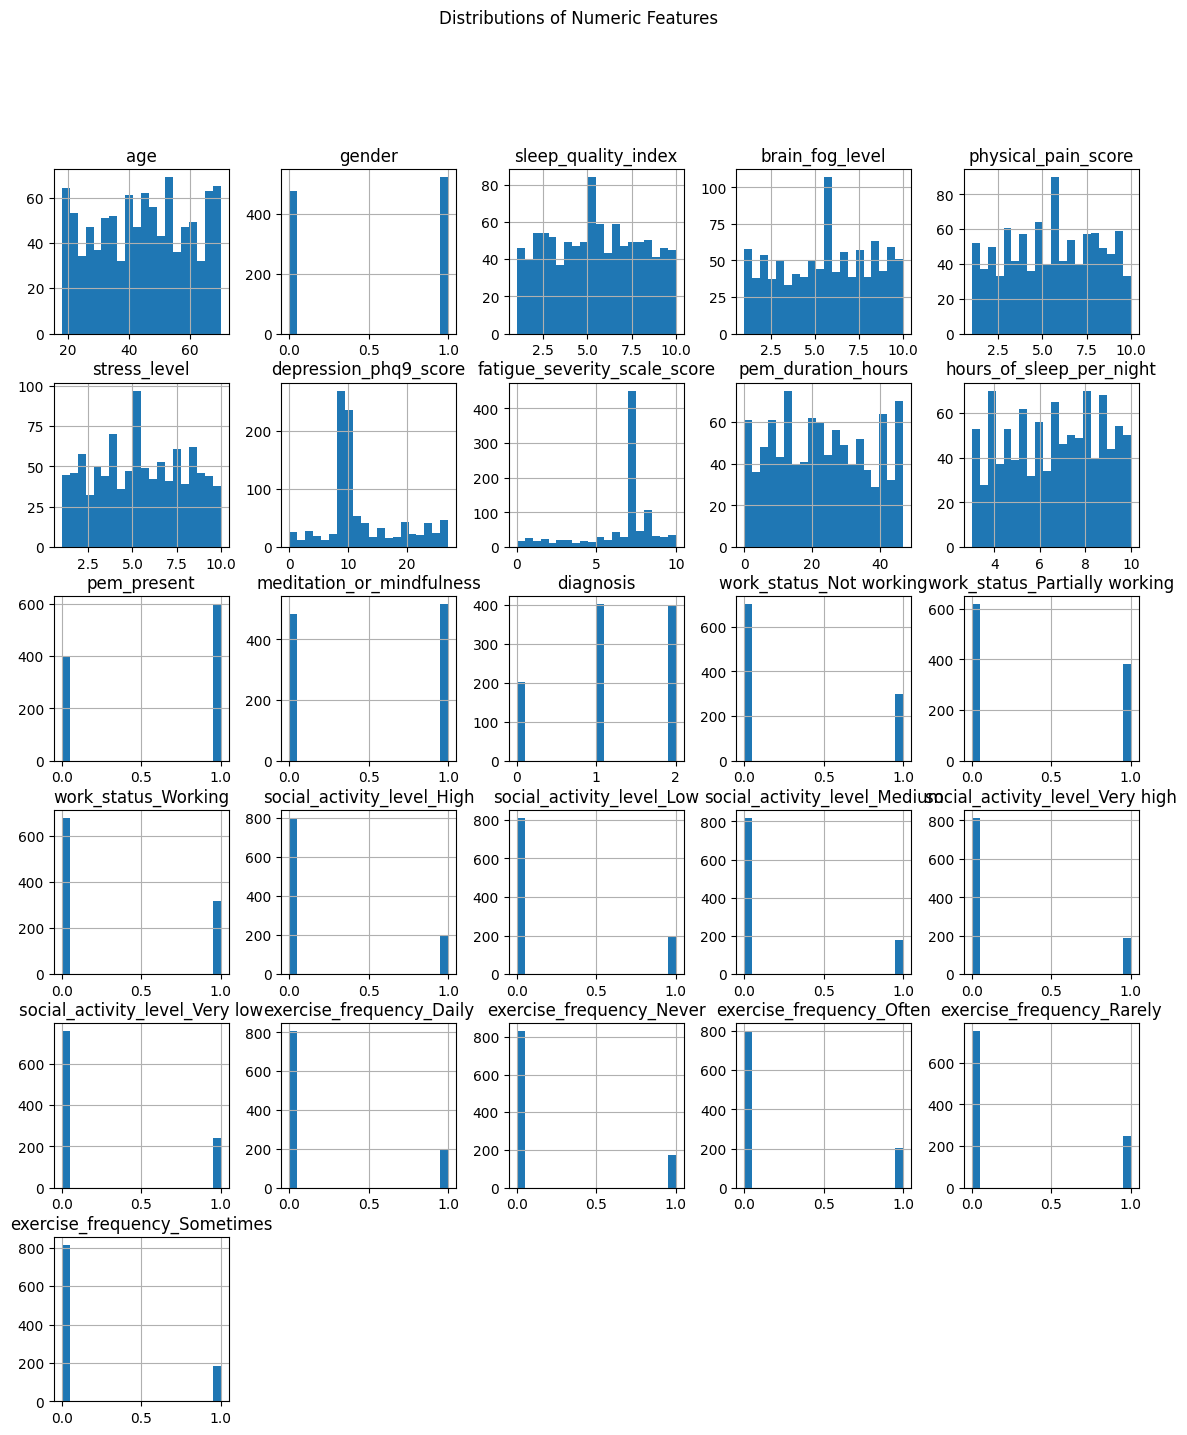

In [113]:

import matplotlib.pyplot as plt
import seaborn as sns

file.hist(figsize=(14, 16), bins=20)
plt.suptitle('Distributions of Numeric Features')
plt.show()


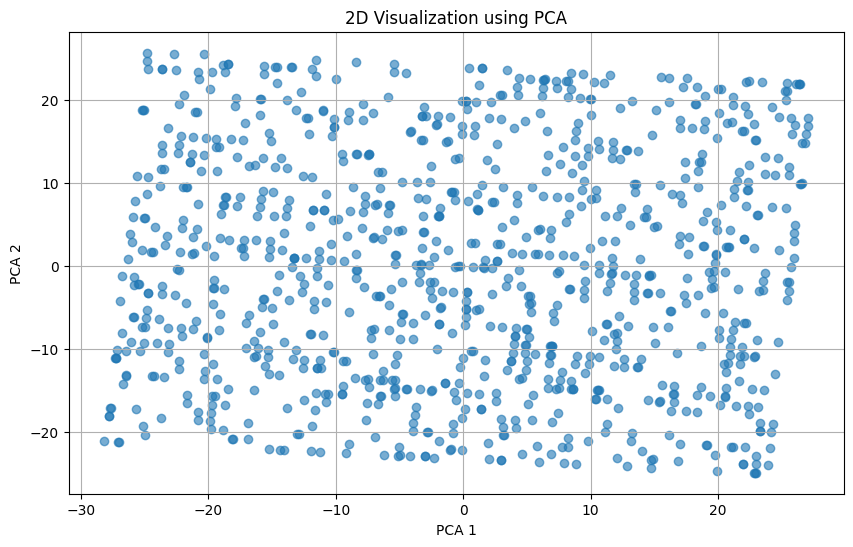

In [114]:

pca = PCA(n_components=2)
pca_result = pca.fit_transform(file)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6)
plt.title("2D Visualization using PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


In [115]:
label=file['diagnosis']
features=file.drop(columns='diagnosis',axis=1)

# Split Data

In [116]:
x_train,x_test,y_train,y_test=train_test_split(features,label,random_state=42,test_size=.3)

In [117]:
num_classes = 3
y_train = to_categorical(y_train, num_classes=num_classes)

In [118]:

model=Sequential()

model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(16, activation='relu'))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(4, activation='relu'))

model.add(Dense(3, activation='softmax'))





c:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [119]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [120]:
history = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3674 - loss: 2.0511 - val_accuracy: 0.4071 - val_loss: 1.2619
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4557 - loss: 1.1970 - val_accuracy: 0.4714 - val_loss: 1.0075
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5332 - loss: 1.0222 - val_accuracy: 0.5571 - val_loss: 0.8989
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5746 - loss: 0.8854 - val_accuracy: 0.5857 - val_loss: 0.8178
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6038 - loss: 0.8179 - val_accuracy: 0.6429 - val_loss: 0.8025
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6730 - loss: 0.7369 - val_accuracy: 0.7143 - val_loss: 0.7161
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7469 - loss: 0.6588 - val_accuracy: 0.7286 - val_loss: 0.7010
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7630 - loss: 0.6024 - val_accuracy: 0.7

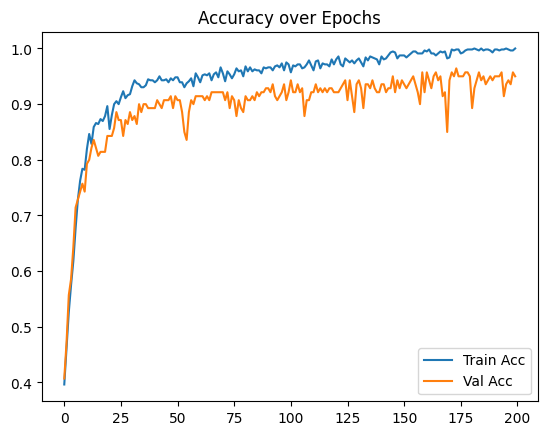

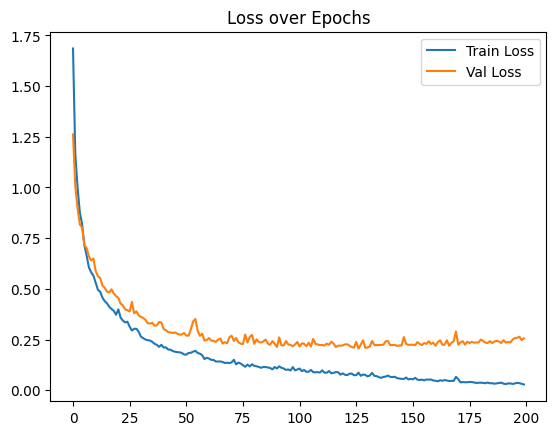

In [121]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Classification Report:
              precision    recall  f1-score   support

  depression       0.84      0.69      0.76        54
      ME/CFS       1.00      1.00      1.00       125
        Both       0.87      0.94      0.90       121

    accuracy                           0.92       300
   macro avg       0.90      0.88      0.89       300
weighted avg       0.92      0.92      0.92       300


Accuracy =  0.92


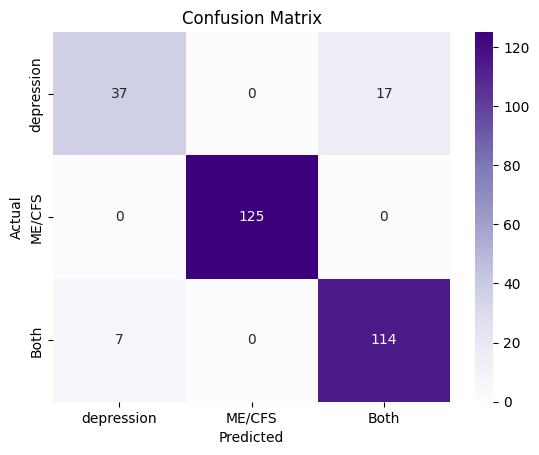

In [122]:

y_pred_prob = model.predict(x_test)

y_pred = np.argmax(y_pred_prob, axis=1)

labels = ['depression', 'ME/CFS', 'Both']

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=labels))

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy = ", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
